   Unnamed: 0  internetActivity
0           3         50.527840
1           3         46.167273
2           3         34.979989
3           3         30.975184
4           3         32.125861


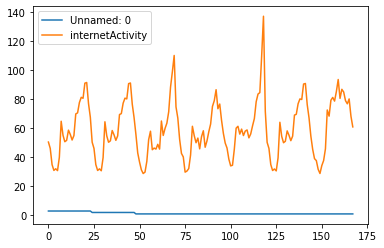

In [82]:
#https://github.com/ivanarielcaceres/timeseries-lstm-keras/blob/master/timeseries-prediction.ipynb
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np


df = pd.read_csv('g3.csv')
df=df.drop(['gridID','smsIn','smsOut','callIn','callOut'],axis=1)
print(df.head())
df.plot()


In [83]:

columns_to_keep = ['internetActivity']
df = df[columns_to_keep]
df['internetActivity'] = df['internetActivity'].apply(lambda x: x*1000)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 168


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,internetActivity
0,50527.840166
1,46167.272850
2,34979.988709
3,30975.184098
4,32125.861496


In [84]:
df.describe()

,internetActivity
count,168.000000
mean,59329.403782
std,19340.680578
min,28835.128844
25%,45871.092892
50%,55938.847157
75%,73833.796221
max,137260.205806


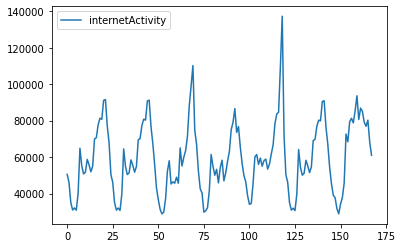

In [85]:
df.plot()

In [70]:
#null값
df.isnull().sum()

internetActivity    0
dtype: int64

In [86]:
print('Min', np.min(df))
print('Max', np.max(df))

Min internetActivity    28835.128844
dtype: float64
Max internetActivity    137260.205806
dtype: float64


In [87]:
dataset = df.astype('float64')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [88]:
print(scaled[:24])

[[0.20007098]
 [0.15985365]
 [0.05667379]
 [0.01973764]
 [0.03035029]
 [0.01870095]
 [0.10339111]
 [0.33236317]
 [0.24358072]
 [0.20221443]
 [0.21110425]
 [0.27576923]
 [0.24869368]
 [0.21314124]
 [0.24178533]
 [0.3789206 ]
 [0.38566448]
 [0.45127529]
 [0.48445495]
 [0.47844148]
 [0.57440569]
 [0.5788427 ]
 [0.44481729]
 [0.35800053]]


In [89]:
#Create RNN
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 117
test: 51


In [90]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [91]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

117 1
0
X 0 to 1
[0.20007098]
Y 1
0.15985364725415807
1
X 1 to 2
[0.15985365]
Y 2
0.05667378836773396
2
X 2 to 3
[0.05667379]
Y 3
0.019737641095125213
3
X 3 to 4
[0.01973764]
Y 4
0.030350291135590735
4
X 4 to 5
[0.03035029]
Y 5
0.018700952229049883
5
X 5 to 6
[0.01870095]
Y 6
0.10339111380444765
6
X 6 to 7
[0.10339111]
Y 7
0.3323631656384561
7
X 7 to 8
[0.33236317]
Y 8
0.24358072362542177
8
X 8 to 9
[0.24358072]
Y 9
0.20221442599796652
9
X 9 to 10
[0.20221443]
Y 10
0.21110425134043626
10
X 10 to 11
[0.21110425]
Y 11
0.2757692267809732
11
X 11 to 12
[0.27576923]
Y 12
0.24869368309302237
12
X 12 to 13
[0.24869368]
Y 13
0.21314124308147664
13
X 13 to 14
[0.21314124]
Y 14
0.24178533486520642
14
X 14 to 15
[0.24178533]
Y 15
0.3789206006343419
15
X 15 to 16
[0.3789206]
Y 16
0.3856644841824414
16
X 16 to 17
[0.38566448]
Y 17
0.4512752874712785
17
X 17 to 18
[0.45127529]
Y 18
0.48445494502401726
18
X 18 to 19
[0.48445495]
Y 19
0.47844148425700345
19
X 19 to 20
[0.47844148]
Y 20
0.5744056892309

In [92]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(115, 1, 1)
(49, 1, 1)


In [93]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
 - 0s - loss: 0.0524
Epoch 2/100
 - 0s - loss: 0.0266
Epoch 3/100
 - 0s - loss: 0.0258
Epoch 4/100
 - 0s - loss: 0.0246
Epoch 5/100
 - 0s - loss: 0.0239
Epoch 6/100
 - 0s - loss: 0.0221
Epoch 7/100
 - 0s - loss: 0.0220
Epoch 8/100
 - 0s - loss: 0.0217
Epoch 9/100
 - 0s - loss: 0.0205
Epoch 10/100
 - 0s - loss: 0.0195
Epoch 11/100
 - 0s - loss: 0.0190
Epoch 12/100
 - 0s - loss: 0.0178
Epoch 13/100
 - 0s - loss: 0.0175
Epoch 14/100
 - 0s - loss: 0.0159
Epoch 15/100
 - 0s - loss: 0.0162
Epoch 16/100
 - 0s - loss: 0.0141
Epoch 17/100
 - 0s - loss: 0.0130
Epoch 18/100
 - 0s - loss: 0.0117
Epoch 19/100
 - 0s - loss: 0.0114
Epoch 20/100
 - 0s - loss: 0.0093
Epoch 21/100
 - 0s - loss: 0.0100
Epoch 22/100
 - 0s - loss: 0.0091
Epoch 23/100
 - 0s - loss: 0.0078
Epoch 24/100
 - 0s - loss: 0.0074
Epoch 25/100
 - 0s - loss: 0.0070
Epoch 26/100
 - 0s - loss: 0.0071
Epoch 27/100
 - 0s - loss: 0.0072
Epoch 28/100
 - 0s - loss: 0.0072
Epoch 29/100
 - 0s - loss: 0.0071
Epoch 30/100
 - 0s - lo

In [94]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

col=['gridID','Internet Activity Prediction']
list1={'gridID':[3],'Internet Activity Prediction':[testScore]}
record=pd.DataFrame(list1)
with open('predictions.csv','r') as infile:
          record.to_csv('predictions.csv',mode='a',header=False)

Train Score: 9031.78 RMSE
Test Score: 12864.90 RMSE


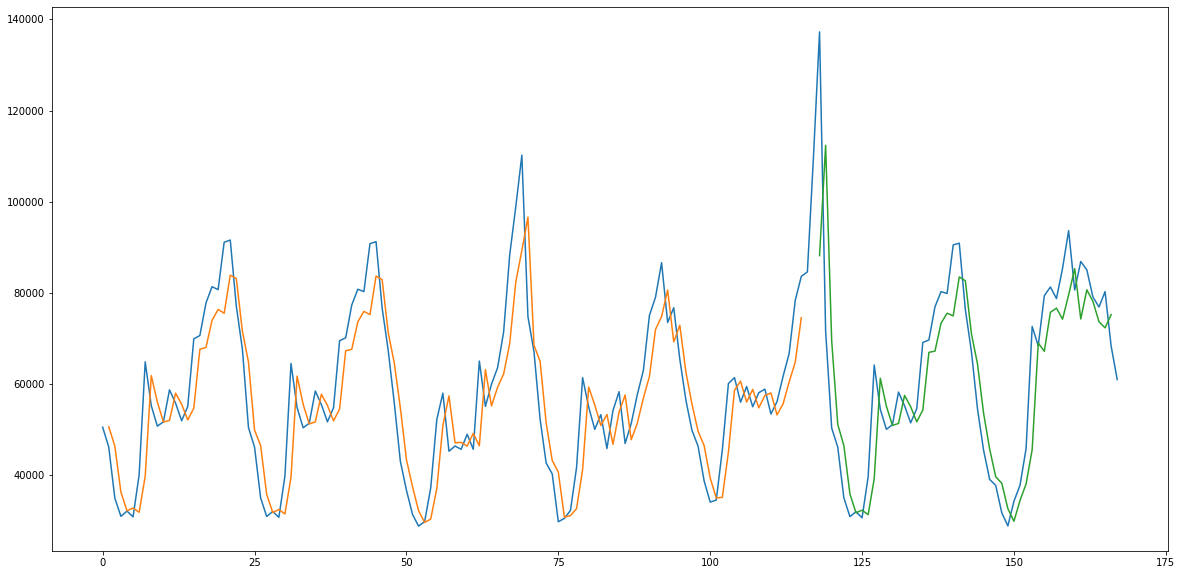

In [95]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

14048055.327840425
